In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('full_data_clustered_ssim_V4.csv')
data = data.replace(np.nan,'None')
data = data.drop(columns=['cluster','cluster_2'])

numerical_cols = ['Score','Number Of Related Vulnerabilities']
categorical_cols = ['Access','Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']
labelencd_cols = ['Vulnerability Type(s)','Vulnerability Name','Access','Complexity','Authentication','Conf.','Integ.','Avail']

df = data.copy()
ohe = pd.concat([
    pd.get_dummies(df[labelencd_cols],dtype=float),
    df[numerical_cols]
],axis=1)


from sklearn.preprocessing import MinMaxScaler 
mn_scaler = MinMaxScaler()
mn_scaler = mn_scaler.fit_transform(df[numerical_cols])
ohe_mn_scaled = pd.concat([
    pd.get_dummies(df[categorical_cols],dtype=float),
    pd.DataFrame(mn_scaler,columns=numerical_cols)
],axis=1)

In [7]:
ohe

,Vulnerability Type(s)_+Info,Vulnerability Type(s)_+Info CSRF,Vulnerability Type(s)_+Info File Inclusion,Vulnerability Type(s)_+Priv,Vulnerability Type(s)_+Priv +Info,Vulnerability Type(s)_+Priv Bypass,Vulnerability Type(s)_+Priv Bypass +Info,Vulnerability Type(s)_+Priv CSRF,Vulnerability Type(s)_+Priv Dir. Trav.,Vulnerability Type(s)_+Priv Mem. Corr.,...,Integ._Complete,Integ._None,Integ._Partial,Integ._Unknown,Avail_Complete,Avail_None,Avail_Partial,Avail_Unknown,Score,Number Of Related Vulnerabilities
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.5,3011.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.8,754.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,9380.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.1,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0
61694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1320.0
61695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.8,754.0
61696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0


In [8]:
# !pip install scikit-fda

from skfda.ml.clustering import FuzzyCMeans
from skfda.representation.grid import FDataGrid

n_clusters = 2
fcm = FuzzyCMeans(n_clusters=n_clusters,fuzzifier=2)
fcm.fit(FDataGrid(ohe))

FuzzyCMeans()

In [12]:
cluster_labels = fcm.labels_
cluster_labels


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
fuzzy_membership = fcm.membership_degree_
pd.DataFrame(fuzzy_membership)

,0,1
0,0.002283,0.997717
1,0.999625,0.000375
2,0.984360,0.015640
3,0.802654,0.197346
4,0.980519,0.019481
...,...,...
61693,0.002283,0.997717
61694,0.989795,0.010205
61695,0.984360,0.015640
61696,0.002283,0.997717


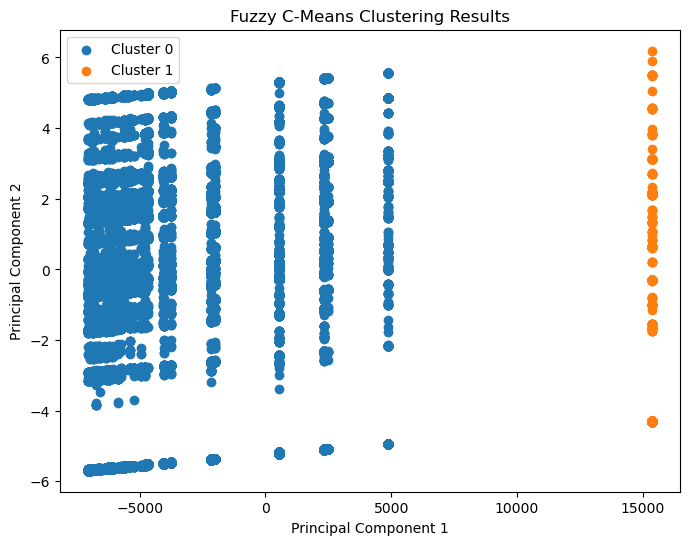

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA on the reduced_data from the previous code
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(ohe)

# Plot the clusters using scatter plot
plt.figure(figsize=(8, 6))
for cluster_idx in range(n_clusters):
    plt.scatter(
        reduced_data_pca[cluster_labels == cluster_idx, 0],
        reduced_data_pca[cluster_labels == cluster_idx, 1],
        label=f'Cluster {cluster_idx}'
    )

plt.title('Fuzzy C-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


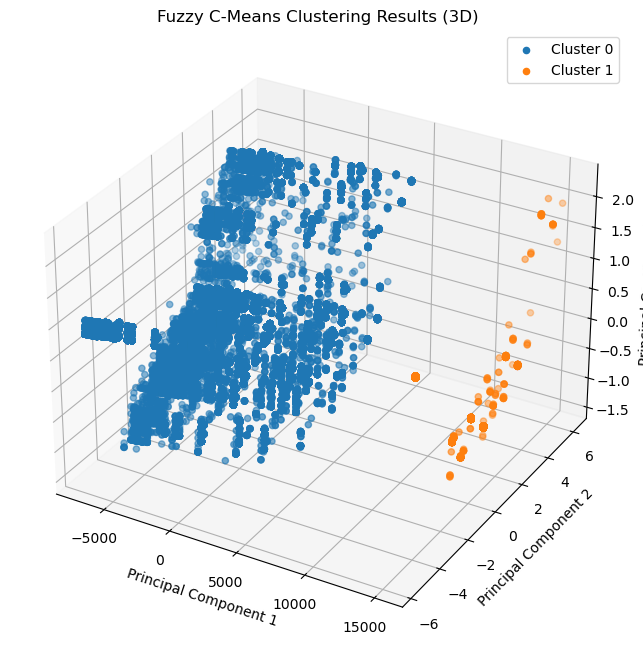

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA on the reduced_data from the previous code
pca = PCA(n_components=3)
reduced_data_pca = pca.fit_transform(ohe)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_idx in range(n_clusters):
    ax.scatter(
        reduced_data_pca[cluster_labels == cluster_idx, 0],
        reduced_data_pca[cluster_labels == cluster_idx, 1],
        reduced_data_pca[cluster_labels == cluster_idx, 2],
        label=f'Cluster {cluster_idx}'
    )

ax.set_title('Fuzzy C-Means Clustering Results (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()
